# 4-7 箱ひげ図
データのばらつきをわかりやすく表現するためのグラフ

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline

## 箱ひげ図を作成する

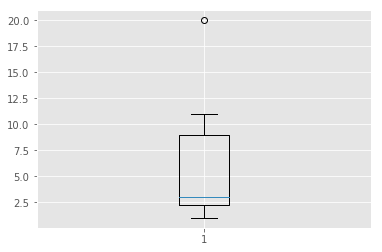

In [2]:
'''
Axes.boxplot()メソッドを使用して作成する
'''

x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)

plt.show()

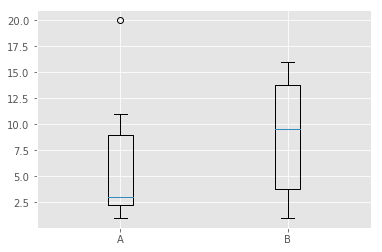

In [3]:
# 複数のリストをリストにセット
x = [[1, 2, 3, 3, 11, 20], [1, 2, 9, 10, 15, 16]]
labels = ['A', 'B']

fig = plt.figure()
ax = fig.add_subplot(111)

# データとラベルを指定
ax.boxplot(x, labels=labels)

plt.show()

## 箱ひげ図を活用する

In [4]:
import os
import pandas as pd
base_url = '../../practical-jupyter/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


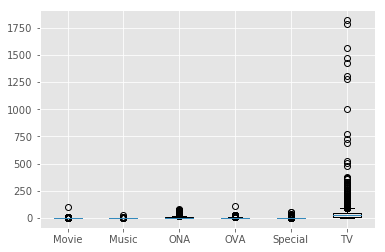

In [5]:
'''
配給種別ごとのエピソード数を可視化
'''

labels = []
types_list = []

# 配給種別ごとのエピソード数の情報リスト化
for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

plt.show()

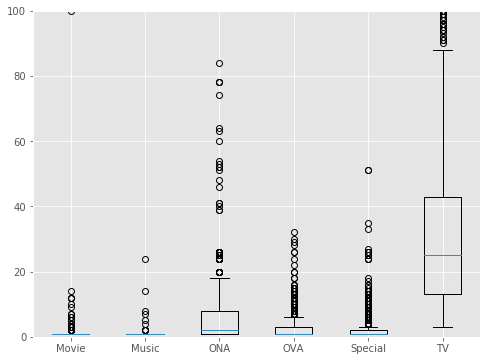

In [6]:
'''
描画範囲を指定
'''

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

# Y軸の描画範囲を0から100までに限定
ax.set_ylim(0, 100)

plt.show()

In [7]:
# 四分位点の値を確認
df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

## 箱ひげ図の書式を一括設定する

In [11]:
# データセットを作成
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000)
                  for mu in range(1, 5)]

In [13]:
# 書式の辞書を作る

# 外れ値の書式辞書
flierprop = {'color': '#EC407A',
                    'marker': 'o',
                    'markerfacecolor': '#2196F3',
                    'markeredgecolor': 'white',
                    'markersize': 5,
                    'linestyle': 'None',
                    'linewidth': 0.1}

# 箱の書式辞書
boxprop = {'color': '#2196F3',
                    'facecolor': '#BBDEFB',
                    'linewidth': 1,
                    'linestyle': '-'}

# ヒゲの書式辞書
whiskerprop = {'color': '#2196F3',
                      'linewidth': 1,
                      'linestyle': '--'}

# ヒゲ末端キャップの書式辞書
capprop = {'color': '#2196F3',
                      'linewidth': 1,
                      'linestyle': ':'}

#  中央値の書式辞書
medianprop = {'color': '#2196F3',
                         'linewidth': 2,
                         'linestyle': '-'}

# 平均値の書式辞書
meanprop = {'color': '#2196F3',
                   'marker': '^',
                   'markerfacecolor': '#2196F3',
                   'markeredgecolor': 'white',
                   'markersize': 10,
                   'linewidth': 1,
                   'linestyle': ''}

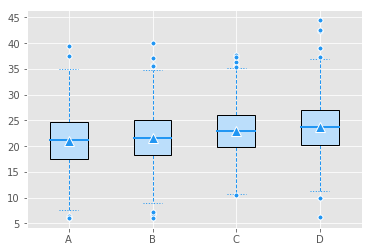

In [15]:
# 描画する

fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(
    dataset,
    patch_artist='Patch',              # 書式を設定する場合は「Patch」を選択
    labels=['A', 'B', 'C', 'D'],         # 項目ラベル
    showmeans=True,                   # 平均値の描画
    flierprops=flierprop,                # はずれ値の書式設定
    boxprops=boxprop,                # 箱の書式設定
    whiskerprops=whiskerprop,  # ヒゲの書式設定
    capprops=capprop,                # ヒゲ末端キャップの書式設定
    medianprops=medianprop,   # 中央値の書式設定
    meanprops=meanprop          # 平均値の書式設定
)

plt.show()

## ボックスごとに書式を設定する

In [ ]:
# 図の描画
fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(dataset, patch_artist='Patch', labels=['A', 'B', 'C', 'D'],
                             meanline=True, showmeans=True)

# カラーセット
colors1 = ['#2196F3', '#43A047', '#FBC02D', '#FB8C00']
colors2 = ['#BBDEFB', '#C8E6C9', '#FFF9C4', '#FFE0B2']

# 上下に分かれた要素に設定するための用の数列
n = [0, 0, 1, 1, 2, 2, 3, 3]

# 書式設定
# 箱とはずれ値、中央値の書式設定
for params in zip(bp['boxes'],
                              bp['fliers'],
                              bp['medians'],
                              colors1,
                              colors2):
    
    bpb, bpf, med, color1, color2 = params
    
    # 箱の書式設定
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    # 外れ値の書式設定
    bpf.set(marker='^', color=color2)
    bpf.set_markeredgecolor("white")
    bpf.set_markerfacecolor(color1)
    
    # 中央値の書式設定
    med.set_color(color1)
    med.set_linewidth(2)
    
# ヒゲとヒゲの末端キャップの書式設定
for bpc, m in zip(bp['caps'], bp['whiskers'], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)
    
# 平均値の書式設定
for mean, color2 in zip(bp['means'], )